# **Machine Learning**

# Polynomial Regression

In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Loading the Dataset
df = sns.load_dataset("tips")
# Displaying the first few rows of the dataset
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [5]:
# Let's check for missing values in our dataset
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [20]:
# Select feature and target variable
X = df[["total_bill"]]
y = df["tip"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create polynomial features
poly = PolynomialFeatures(degree=3)  # You can change the degree for higher polynomials
X_poly = poly.fit_transform(X_train)
# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y_train)

LinearRegression()

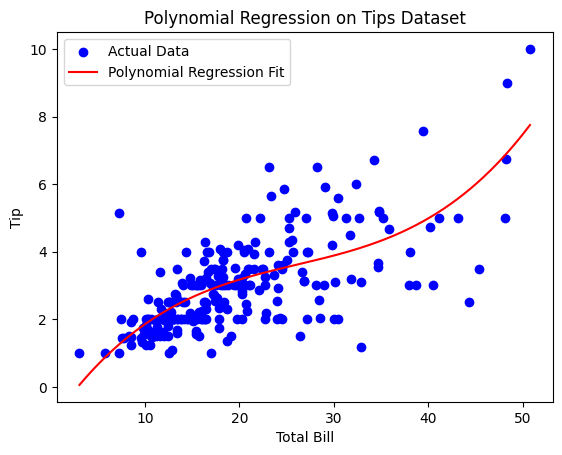

In [21]:
# Import Warnings
import warnings
warnings.filterwarnings("ignore")
# Predicting and plotting
X_grid = np.arange(min(X['total_bill']), max(X['total_bill']), 0.1).reshape(-1, 1)
X_grid_poly = poly.transform(X_grid)
y_grid = model.predict(X_grid_poly)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_grid, y_grid, color='red', label='Polynomial Regression Fit')
plt.title('Polynomial Regression on Tips Dataset')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend()
plt.show()